## 6.4 Supervised Machine Learning: Regression

### This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Check extreme values
4. Hypothesis
5. Data prep for regression analysis
6. Regression analysis
7. Result/Conclusions

### 1. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium 
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap
from folium.features import GeoJsonPopup, GeoJsonTooltip
import json
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define path
path = r'C:\Users\sandu\Desktop\Data Immersion&Analytics\6.ADV ANALYTICS\3 Data\Prepared Data'
path1 =r'C:\Users\sandu\Desktop\Data Immersion&Analytics\6.ADV ANALYTICS\4 Analytics\Visualizations'

In [3]:
# Display plots without calling 
%matplotlib inline

#This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

In [4]:
# Define column types
dtype_options = {'15':str}

In [5]:
# Import data
df = pd.read_csv(os.path.join(path,'AirBnB_cleaned3.csv'),  index_col=0, low_memory=False)

In [6]:
# Display all columns 
pd.set_option('display.max_columns', None)

### 2. Data Cleanining

In [7]:
# Display columns
df.columns

Index(['Review ID', 'Review_Date', 'Reviewer ID', 'Rating_Comment',
       'Listing ID', 'Listing Name', 'Host ID', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Is Superhost',
       'Neighborhood Group', 'City', 'Postal Code', 'Country', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accomodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready', 'Price category', 'Rating Category',
       'Accomodation Size'],
      dtype='object')

In [8]:
df.head(10)

,Review ID,Review_Date,Reviewer ID,Rating_Comment,Listing ID,Listing Name,Host ID,Host Since,Host Response Time,Host Response Rate,Is Superhost,Neighborhood Group,City,Postal Code,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price category,Rating Category,Accomodation Size
0,58660447,2016-01-03,14876562,"Very nice, clean appartement! Josh was really ...",10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,2015-09-20,Unknown,Unknown,False,Neukolln,Berlin,12047.0,Germany,52.49234,13.42994,Apartment,Entire home/apt,4,1.0,2.0,2.0,60.0,1,1,1,2016-01-03,2016-01-03,100.0,8.0,10.0,6.0,10.0,10.0,10.0,False,False,Middle price,Good Rating,Couple Accomodation
1,58663795,2016-01-03,49367757,Aki is really nice and friendly. We had an ama...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
2,59003619,2016-01-05,46694292,Aki is a very nice dude with a clean place in ...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
3,66845661,2016-03-25,54542819,Aki's place was easy to find and located in th...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
4,67969785,2016-04-01,35352843,We had to wait 30mins for Aki to arrive but ot...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
5,68816282,2016-04-06,48006291,"Great room, very comfortable and clean. Aki an...",10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
6,69289363,2016-04-10,63759402,Aki was really friendly and available giving u...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
7,69780867,2016-04-13,53960263,Aki es sin duda el mejor host q uno puede tene...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
8,70426866,2016-04-17,26184931,"We did not meer Aki, but we did meet FabiÃ¡n, ...",10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,False,Middle price,Good Rating,Single Accomodation
9,78320875,2016-06-06,12388715,Aki was an awesome host in Berlin. We got alon...

In [9]:
# Display rows and columns
df.shape

(406402, 41)

#### Missing Values

In [10]:
# Check for missing values
df.isnull().sum()

Review ID                  0
Review_Date                0
Reviewer ID                0
Rating_Comment           195
Listing ID                 0
Listing Name             150
Host ID                    0
Host Since                 0
Host Response Time         0
Host Response Rate         0
Is Superhost               0
Neighborhood Group         0
City                       0
Postal Code                0
Country                    0
Latitude                   0
Longitude                  0
Property Type              0
Room Type                  0
Accomodates                0
Bathrooms                  0
Bedrooms                   0
Beds                       0
Price                      0
Guests Included            0
Min Nights                 0
Reviews                    0
First Review               0
Last Review                0
Overall Rating             0
Accuracy Rating            0
Cleanliness Rating         0
Checkin Rating             0
Communication Rating       0
Location Ratin

In [11]:
# Check for duplicates
dups = df.duplicated()
dups.shape # No Dups

(406402,)

### 3. Check extreme values

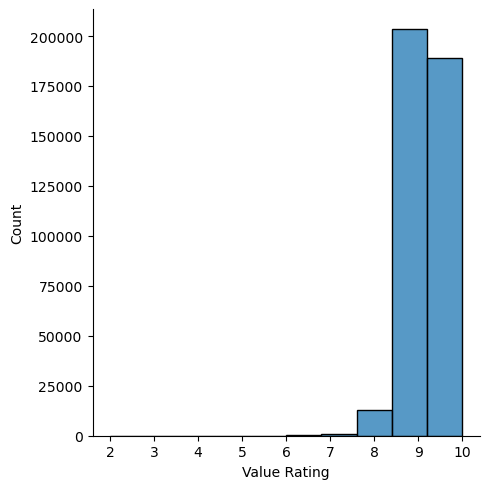

In [12]:
sns.displot(df['Value Rating'], bins=10)

In [14]:
# Check the median
df['Value Rating'].median() # median

9.0

In [13]:
df['Value Rating'].describe() # Mean = 9.42, Max = 10.0, Median = 9.0

count    406402.000000
mean          9.426066
std           0.580784
min           2.000000
25%           9.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: Value Rating, dtype: float64

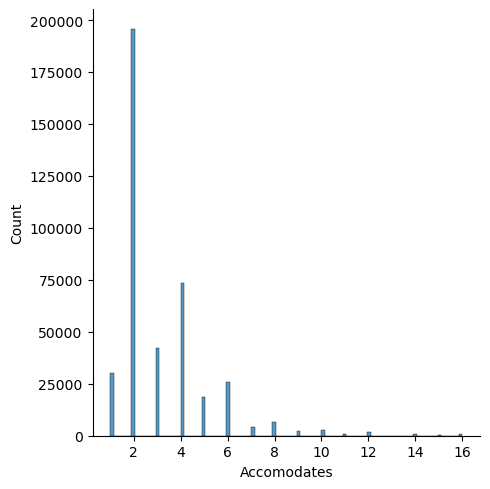

In [15]:
sns.displot(df['Accomodates'], bins=100) # Shows extreme values
# I think some outliers need to be removed

In [16]:
df['Accomodates'].describe() # Mean = 3.15, Max = 16.0, Median = 2.0

count    406402.000000
mean          3.151980
std           1.989311
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          16.000000
Name: Accomodates, dtype: float64

NOTE: From task 6.2 I already have scatterplots saved and I want to analyze Accomodates/Value Rating due to the highest correlation.

### 4. Hypothesis: The more people can be accomodated the better the value rating.

### 5. Data prep for regression analysis

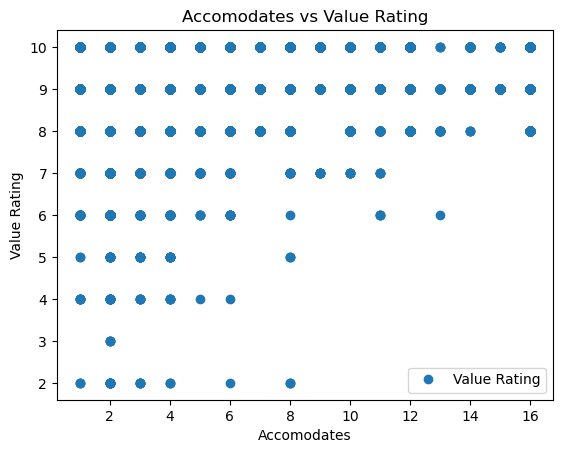

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'Accomodates', y='Value Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Accomodates vs Value Rating')  
plt.xlabel('Accomodates')  
plt.ylabel('Value Rating') 
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['Accomodates'].values.reshape(-1,1)
y = df['Value Rating'].values.reshape(-1,1)

In [19]:
X

array([[4],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [20]:
y

array([[10.],
       [ 9.],
       [ 9.],
       ...,
       [ 9.],
       [ 9.],
       [ 9.]])

In [21]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6. Regressoin analysis

In [22]:
# Create a regression object.
regression = LinearRegression()  
# This is the regression object, which will be fit onto the training set

In [23]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

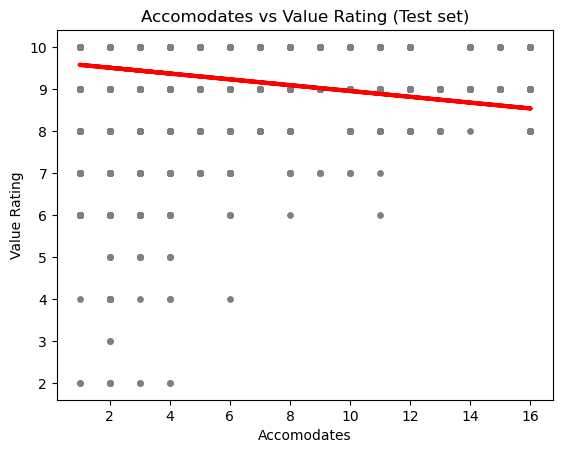

In [25]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Accomodates vs Value Rating (Test set)')
plot_test.xlabel('Accomodates')
plot_test.ylabel('Value Rating')
plot_test.show()

NOTE: It doesnt look like the model is a good fit as the regression line is not in the direction of relationship

In [26]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.06930957]]
Mean squared error:  0.3192023731234615
R2 score:  0.057310881076104936


NOTE: Model performance is really bad. MSE of 0.3110993271703161 is relatively high compared to the variance and the R2 score of 0.054739342681216274 is also very low.

In [28]:
y_predicted

array([[9.50518279],
       [9.50518279],
       [9.22794451],
       ...,
       [9.50518279],
       [9.29725408],
       [9.36656365]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,10.0,9.505183
1,9.0,9.505183
2,8.0,9.227945
3,9.0,9.297254
4,10.0,9.505183
5,10.0,9.505183
6,10.0,9.435873
7,10.0,9.297254
8,9.0,9.227945
9,8.0,9.505183


##### Compare how the regression fits the training set

In [30]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.06930957]]
Mean squared error:  0.317742218966707
R2 score:  0.05644414740367598


NOTE: The MSE here is nearly the same as with the test set. Means the model isn't overfitted. The R2 score is a little bit better but still very low.

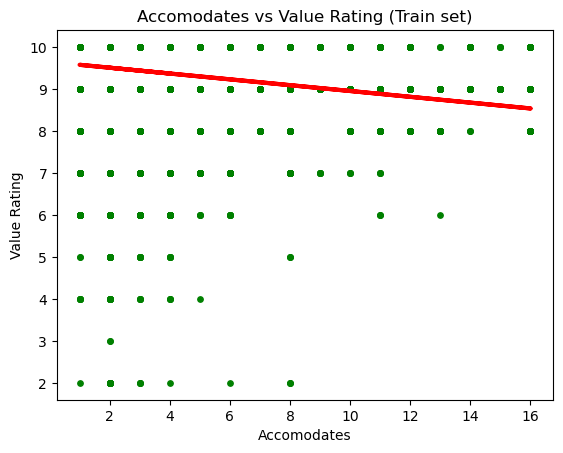

In [33]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Accomodates vs Value Rating (Train set)')
plot_test.xlabel('Accomodates')
plot_test.ylabel('Value Rating')
plot_test.show()

### 7. Result/Conclusions

#### Hypothesis: The more people can be accomodated the better the value rating.
Only partially true.
The number of accomodates isn't a good standalone indicator for better Value Rating.
I think there are to many factors that influence the rating other than price. A multiple regression model could be a better fit.
Something regarding bias to consider here is that people tend to only give a rating if the accomodation was bad. Even though AirBnB does a lot to get the users to rate the listings every time. So there could be some negativity bias here.¶

### 8. New Hypothetis
#### If Cleanliness Rating of the listing is higher, Price gets higher.

In [34]:
df['Cleanliness Rating'].describe()

count    406402.000000
mean          9.492744
std           0.693829
min           2.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: Cleanliness Rating, dtype: float64

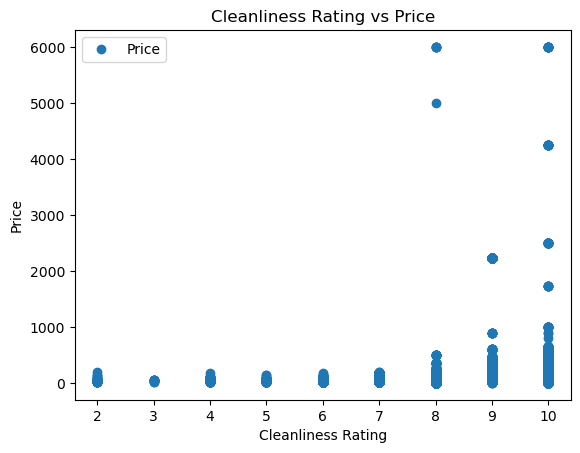

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Cleanliness Rating', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cleanliness Rating vs Price')  
plt.xlabel('Cleanliness Rating')  
plt.ylabel('Price')  
plt.show()

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_2 = df['Cleanliness Rating'].values.reshape(-1,1)
y_2 = df['Price'].values.reshape(-1,1)

In [38]:
X_2

array([[10.],
       [ 8.],
       [ 8.],
       ...,
       [ 9.],
       [ 9.],
       [ 9.]])

In [39]:
y_2

array([[60.],
       [35.],
       [35.],
       ...,
       [80.],
       [80.],
       [80.]])

In [40]:
# Split data into a training set and a test set.
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [41]:
# Create a regression object.
regression = LinearRegression()  

# Fit the regression object onto the training set.
regression.fit(X_2_train, y_2_train)

LinearRegression()

In [43]:
# Predict the values of y using X.
y_2_predicted = regression.predict(X_2_test)

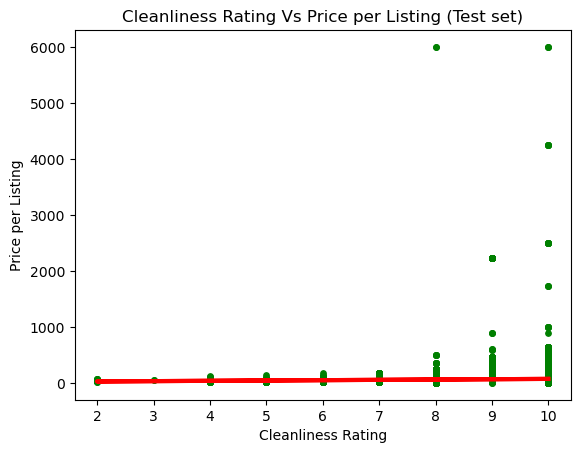

In [44]:
# Create a plot that shows the regression line from the model on the test set.
plot_test_2 = plt
plot_test_2.scatter(X_2_test, y_2_test, color='green', s = 15)
plot_test_2.plot(X_2_test, y_2_predicted, color='red', linewidth =3)
plot_test_2.title('Cleanliness Rating Vs Price per Listing (Test set)')
plot_test_2.xlabel('Cleanliness Rating')
plot_test_2.ylabel('Price per Listing')
plot_test_2.show()

In [45]:
# Create objects that contain the model summary statistics.
rmse_2 = mean_squared_error(y_2_test, y_2_predicted) #  mean squared error
r2_2 = r2_score(y_2_test, y_2_predicted) #  R2 score. 

In [46]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[5.69280001]]
Mean squared error:  6795.785351325448
R2 score:  0.00199670442741684


In [47]:
y_2_predicted

array([[72.9687775 ],
       [67.27597749],
       [67.27597749],
       ...,
       [72.9687775 ],
       [72.9687775 ],
       [72.9687775 ]])

In [48]:
# Create a dataframe comparing the actual and predicted values of y.
data_2 = pd.DataFrame({'Actual': y_2_test.flatten(), 'Predicted': y_2_predicted.flatten()})
data_2.head(10)

,Actual,Predicted
0,40.0,72.968777
1,80.0,67.275977
2,155.0,67.275977
3,80.0,67.275977
4,45.0,72.968777
5,29.0,72.968777
6,33.0,72.968777
7,76.0,67.275977
8,210.0,67.275977
9,65.0,72.968777


In [49]:
# Predict.
y_2_predicted_train = regression.predict(X_2_train) # This is predicting X_train!

In [50]:
rmse_2 = mean_squared_error(y_2_train, y_2_predicted_train)
r2_2 = r2_score(y_2_train, y_2_predicted_train)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[5.69280001]]
Mean squared error:  7164.087092892915
R2 score:  0.0021707533438379834


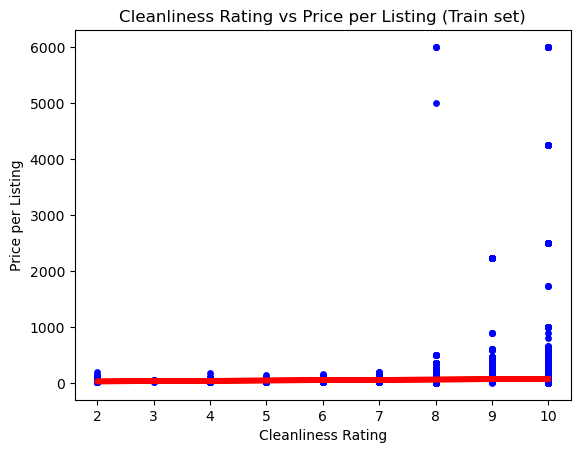

In [52]:
# Visualizing the training set results.
plot_train_2 = plt
plot_train_2.scatter(X_2_train, y_2_train, color='blue', s = 15)
plot_train_2.plot(X_2_train, y_2_predicted_train, color='red', linewidth =4)
plot_train_2.title('Cleanliness Rating vs Price per Listing (Train set)')
plot_train_2.xlabel('Cleanliness Rating')
plot_train_2.ylabel('Price per Listing')
plot_train_2.show()

#### Conclusions:

The +ve slope of 5 means that as X rises (as the Cleanliness Rating rises), y slightly drops (the Price rises). It shows there is a weak positive relationship between the variables.
However, there is very high mean squared errors of 6795 & 7164 in the test and training regressions respectively. Moreover, the actual and predicted values vary greatly in size. As such, this high level of MSE means that the regression line is not very close to the observations, and therefore is clearly not a good fit.

Lastly, we have very low R-squared values of 0.0012 and 0.0023 respectively. After looking at of these, it’s pretty clear that model isn’t performing well which highlights that these variables do not truly impact one another.
Furthermore, it is likely that the Price per night of a stay could be influenced by other factors such as Room and/or Neighborhood.